$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 5 $$

# `01` Assignment 01

- Design your LSTM learning model to classify hand-written digits (MNIST dataset).
- To handle images as a sequence, the LSTM input can be seen as a 28 sequences
of 28 elements each (taking each row of pixels as a single time step input).
- Then, you can use dense layer(s) on top (connected to the
output of the LSTM).
- Important Notes:
  - Image Size: $28\times28$
  - Use $80\%$ of the provided training data for training and $20\%$ for validation (Keep the test data for testing after training).
  - Use $32$ units in the LSTM layer and $15\%$ recurrent dropout.
  - Use Categorical Cross Entropy for the loss calculation, `Adam` for optimization and `accuracy` for metrics.


  **Additional Requirements**:
  - Try adding a second LSTM layer before the dense layer(s).
  - Change the number of cells to $48, 96, 256$ and report the accuracy curve.

## `+` Import Libraries

In [2]:
from keras.datasets import mnist

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation , LSTM ,ConvLSTM1D , Reshape
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
import tensorflow as tf

# `+` Seed Value

In [4]:
SEED = 907

## `+` Load & Preprocess MNIST Dataset

**Reminder:** You might need rescaling, and/or other preprocessing methods.

In [5]:
minst_image = mnist.load_data()
(x_train, y_train), (x_test, y_test) = minst_image

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
x_train.shape

(60000, 28, 28)

In [24]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

## `+` Set Global Parameters

In [9]:
BATCH_SIZE  = 16
EPOCHS      = 30

## `i` Model Design

In [26]:
model = Sequential()
model.add(LSTM(32, input_shape=(28, 28), return_sequences=True)) # Changed return_sequences to True
model.add(Dropout(0.15))
model.add(LSTM(64, return_sequences=False)) # Now this layer receives 3D input
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 28, 32)         │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,442 (181.41 KB)

 Trainable params: 46,442 (181.41 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=3)

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.15 , callbacks=earlyStopping)

Epoch 1/30
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - accuracy: 0.7219 - loss: 0.8149 - val_accuracy: 0.9446 - val_loss: 0.1790
Epoch 2/30
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.9498 - loss: 0.1635 - val_accuracy: 0.9714 - val_loss: 0.0965
Epoch 3/30
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 43s 10ms/step - accuracy: 0.9692 - loss: 0.1078 - val_accuracy: 0.9769 - val_loss: 0.0770
Epoch 4/30
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.9756 - loss: 0.0835 - val_accuracy: 0.9729 - val_loss: 0.0948
Epoch 5/30
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.9798 - loss: 0.0706 - val_accuracy: 0.9802 - val_loss: 0.0730
Epoch 6/30
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9819 - loss: 0.0634 - val_accuracy: 0.9854 - val_loss: 0.0503
Epoch 7/30
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9850 - loss: 0.0511 - val_accuracy: 0.9838 - val_loss: 0.0606
Epoch 8/30
3188/3188 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9865 - loss: 

In [30]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9867 - loss: 0.0519


[0.04528827965259552, 0.9886000156402588]

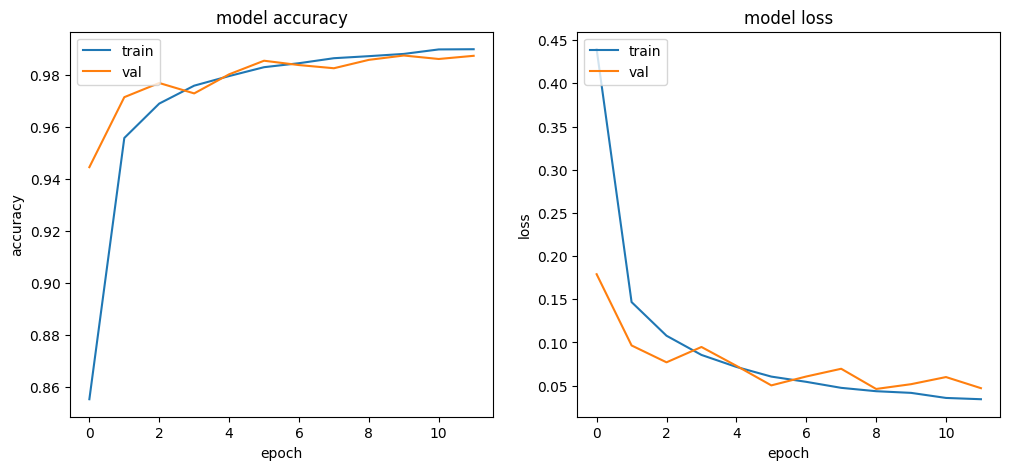

In [31]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

# ***first when using SLTM**
*evaluation is : [0.07058527320623398, 0.9815999865531921]*

____
# ***second using convSLTM1D***
## 1_using kernal = 1 and padding = same
    *evaluation is : [0.07816589623689651, 0.9768999814987183]*
    
## 2_using kernal = 1 and padding = valid
    *evaluation is : [0.09019090235233307, 0.9732999801635742]*

    
## 3_using kernal = 1 and padding = valid
    *evaluation is : [0.07462575286626816, 0.9793999791145325]*

## 4_using kernal = 1 and padding = valid
    *evaluation is : [0.08920244872570038, 0.9776999950408936]*
----
# ***third using two layer lstm***
*evaluation is [0.06059226766228676, 0.9865999817848206]*

# #so the best one by using two layer of SLTM

In [32]:
model.save('mnist_lstm_model.h5')

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$